In [1]:
%load_ext autoreload
%autoreload 2

# Create MEIs with a pretrained model

In [2]:
import matplotlib.pyplot as plt
import math

import datajoint as dj
dj.config['database.host'] = 'at-database.ad.bcm.edu:3306'

dj.conn()

#define the external storage
dj.config['stores'] = {
  'minio': dict( # 'raw' storage for this pipeline
                protocol='file',
                location='/mnt/dj-stor01/users/maria/mouse_neuropixels_meis') #'cifs://at-storage5.ad.bcm.edu/dj-stor01/users/maria/''
}

dj.config["enable_python_native_blobs"] = True
dj.config['nnfabrik.schema_name'] = 'mouse_neuropixels_meis'
dj.config['mei.schema_name'] = 'mouse_neuropixels_meis'

from sensorium.schemas import schema, Fabrikant, Dataset, Model, Trainer, Seed, TrainedModel, MEISeed, MEIMethod, MEISelector, TrainedEnsembleModel, MEI
from sensorium.schemas.scores import CorrelationToAverage, ValidationCorrelationToSingle

Please enter DataJoint username:  mdiamantaki
Please enter DataJoint password:  ·············


Connecting mdiamantaki@at-database.ad.bcm.edu:3306


#### Seed table

In [3]:
# you can manually add as many seeds as you want! uncomment below..
# Seed().insert1({'seed': 1500})
Seed()

seed Random seed that is passed to the model- and dataset-builder
10
100
500
1000
1500


#### Fabrikant table

In [4]:
# you can choose name, email, and affiliation as you like. I'd recommend setting the "name" to the datajoint username.
# insert_dict = {'name': 'maria', 
#                'email': 'mar.diamantaki@gmail.com', 
#                'affiliation': 'atlab'}
# Fabrikant().add_entry(**insert_dict)
Fabrikant()

fabrikant_name Name of the contributor that added this entry,full_name full name of the person,email e-mail address,affiliation conributor's affiliation (e.g. Sinz Lab),dj_username DataJoint username
maria,,mar.diamantaki@gmail.com,atlab,mdiamantaki


#### Dataset Table

In [23]:
files_path = '/mnt/lab/users/Maria/imagenet_data/ImageNet_28489_25_1'

In [24]:
cd $files_path

/mnt/lab/users/Maria/imagenet_data/ImageNet_28489_25_1


In [25]:
cd ..

/mnt/lab/users/Maria/imagenet_data


In [27]:
ls

ImageNet_28489_13_1/  ImageNet_28489_20_1/  ImageNet_28489_5_1/  test_copy/
ImageNet_28489_16_1/  ImageNet_28489_25_1/  destinations.txt*


In [28]:
xargs -n1 -a destinations.txt cp -R ImageNet_28489_25_1 --

SyntaxError: invalid syntax (<ipython-input-28-2be24c579abe>, line 1)

In [34]:
#filenames = ['/notebooks/data/102_110_1_2.zip', '/notebooks/data/102_117_1_2.zip', '/notebooks/data/107_124_1_2.zip', '/notebooks/data/128_22_1_2.zip']
filenames = ['/mnt/lab/users/Maria/imagenet_data/ImageNet_28489_25_1',] # '/notebooks/data/102_117_1_3.zip', '/notebooks/data/107_124_1_3.zip', '/notebooks/data/128_22_1_3.zip']


dataset_fn = 'sensorium.datasets.static_loaders'
dataset_config = {'paths': filenames,
                 'normalize': True,
                 'include_behavior': False,
                 'include_eye_position': False,
                 'batch_size': 64,
                 'exclude': None,
                 'file_tree': True,
                 'scale': 0.25,
                 'add_behavior_as_channels':False,
                 }
Dataset().add_entry(dataset_fn, dataset_config, dataset_fabrikant = "maria", dataset_comment="MD_28489_25_1_su_goodvar")

(Dataset() ) #& 'dataset_hash = "91fe16b392ae975c37de7f1068db98ee"').delete()

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,dataset_config dataset configuration object,dataset_fabrikant Name of the contributor that added this entry,dataset_comment short description,dataset_ts UTZ timestamp at time of insertion
sensorium.datasets.static_loaders,2c111ac18fa164e37404e950abb82dc7,=BLOB=,maria,MD_102_116_allu_goodvar,2022-11-17 09:49:42
sensorium.datasets.static_loaders,48b2973c6bf9f6e3e42b8f488a90c676,=BLOB=,maria,MD_28489_13_1_su_goodvar_ext,2022-11-20 13:09:50
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,=BLOB=,maria,MD_28489_25_1_su_goodvar_ext,2022-11-23 16:51:17
sensorium.datasets.static_loaders,6bf49110998881f8838fa98b47fab1a4,=BLOB=,maria,MD_4ses_an102_107_128_sua_goodvar,2022-11-16 13:35:46
sensorium.datasets.static_loaders,811ec7c0517db5e243298441f614ceaf,=BLOB=,maria,MD_28489_5_1_su_goodvar_ext,2022-11-19 15:14:19
sensorium.datasets.static_loaders,9a1966a89f21d5671d067db5e33dfe29,=BLOB=,maria,MD_4ses_an102_107_128_allu_goodvar,2022-11-17 00:41:49
sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,=BLOB=,maria,MD_28489_25_1_su_goodvar,2022-11-23 23:06:15
sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,=BLOB=,maria,MD_102_116_su_goodvar_ext,2022-11-18 19:39:34
sensorium.datasets.static_loaders,f6e1597f9a26509275661669ea3dcc9b,=BLOB=,maria,MD_102_116_sua_goodvar,2022-11-16 14:20:14
sensorium.datasets.static_loaders,fbd62a4219f0f708ea02e7b397141500,=BLOB=,maria,MD_28489_16_1_su_goodvar_ext,2022-11-20 15:22:00


In [5]:
(Dataset() & 'dataset_ts >= "2022-11-20"') # & 'dataset_hash = "ce38d612f596b70cf8b69de9541ec4ac"').delete()

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,dataset_config dataset configuration object,dataset_fabrikant Name of the contributor that added this entry,dataset_comment short description,dataset_ts UTZ timestamp at time of insertion
sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,=BLOB=,maria,MD_28470_13_1_su_goodvar,2022-12-01 18:10:07
sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,=BLOB=,maria,MD_28488_10_1_su_goodvar,2022-11-29 14:55:45
sensorium.datasets.static_loaders,48b2973c6bf9f6e3e42b8f488a90c676,=BLOB=,maria,MD_28489_13_1_su_goodvar_ext,2022-11-20 13:09:50
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,=BLOB=,maria,MD_28489_25_1_su_goodvar_ext,2022-11-23 16:51:17
sensorium.datasets.static_loaders,8792468a701421f5877b4534327977cb,=BLOB=,maria,MD_28488_21_1_su_goodvar,2022-12-01 12:08:52
sensorium.datasets.static_loaders,97abf77dd9cf4adfe2772ad384abffe5,=BLOB=,maria,MD_28488_16_1_su_goodvar,2022-11-30 13:03:41
sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,=BLOB=,maria,MD_28489_25_1_su_goodvar,2022-11-23 23:06:15
sensorium.datasets.static_loaders,fbd62a4219f0f708ea02e7b397141500,=BLOB=,maria,MD_28489_16_1_su_goodvar_ext,2022-11-20 15:22:00
sensorium.datasets.static_loaders,ff391d76e53badb79f8308b44cd9719a,=BLOB=,maria,MD_28489_20_1_su_goodvar_ext,2022-11-22 18:06:29


#### Model table

In [10]:
# this is the original core SOTA
model_fn = 'sensorium.models.stacked_core_full_gauss_readout'
model_config = {'pad_input': False,
  'stack': -1,
  'layers': 4,
  'input_kern': 9,
  'gamma_input': 6.3831,
  'gamma_readout': 0.0076,
  'hidden_dilation': 1,
  'hidden_kern': 7,
  'hidden_channels': 64,
  'depth_separable': True,
  #'grid_mean_predictor': {'type': 'cortex',
  # 'input_dimensions': 2,
  # 'hidden_layers': 1,
  # 'hidden_features': 30,
  # 'final_tanh': True},
  'init_sigma': 0.1,
  'init_mu_range': 0.3,
  'gauss_type': 'full',
  'shifter': False,}

Model().add_entry(model_fn, model_config, model_fabrikant = "maria", model_comment="state of the art model")
Model()

In [63]:
#this is the pretrained core
#restriction selects the model (that was tranined already), the dataset for which the model was trained, and the trainer hash
# model_restriction = dict(model_hash="192c096b2b4adfc880fd29b995e2a07f", dataset_hash = "9a1966a89f21d5671d067db5e33dfe29", trainer_hash = "328fbc5c2eecd0d5b0605ab037a70373", seed = 1000)

# model_fn = 'sensorium.models.transfer_core_fullgauss_readout'
# model_config = {
#   'transfer_key':model_restriction, # it is some cells below.. fix it!
#   'core_transfer_table':'TrainedModel',
#   'gamma_readout': 0.0076,
#   'init_sigma': 0.1,
#   'init_mu_range': 0.3,
#   'gauss_type': 'full',}

# Model().add_entry(model_fn, model_config, model_fabrikant = "maria", model_comment="LN pretrained model for transfer of 4sessions from animals 102,107,128_all units")

# (Model()) # & 'model_hash = "7ede66b69429cc4eb295160ea40e1002"').delete()

In [64]:
# # this is the simple LN model

# model_fn = 'sensorium.models.stacked_core_full_gauss_readout'
# model_config = {'pad_input': False,
#               'stack': -1,
#               'layers': 3,
#               'input_kern': 9,
#               'gamma_input': 6.3831,
#               'gamma_readout': 0.0076,
#               'hidden_kern': 7,
#               'hidden_channels': 64,
# #               'grid_mean_predictor': {'type': 'cortex',
# #               'input_dimensions': 2,
# #               'hidden_layers': 1,
# #               'hidden_features': 30,
# #               'final_tanh': True},
#               'depth_separable': True,
#               'init_sigma': 0.1,
#               'init_mu_range': 0.3,
#               'gauss_type': 'full',
#               'linear': True
#                }


# Model().add_entry(model_fn, model_config, model_fabrikant = "maria", model_comment="simple LN model")
# Model()

In [6]:
Model()

model_fn name of the model function,model_hash hash of the model configuration,model_config model configuration to be passed into the function,model_fabrikant Name of the contributor that added this entry,model_comment short description,model_ts UTZ timestamp at time of insertion
sensorium.models.stacked_core_full_gauss_readout,192c096b2b4adfc880fd29b995e2a07f,=BLOB=,maria,simple LN model,2022-11-21 20:53:42
sensorium.models.stacked_core_full_gauss_readout,7278b720cc903fb027668bb5530c202f,=BLOB=,maria,state of the art model,2022-11-16 12:50:30
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,=BLOB=,maria,"sota pretrained model for transfer of 4sessions from animals 102,107,128_all units",2022-11-17 09:53:04
sensorium.models.transfer_core_fullgauss_readout,b33175d262574dce108630081bf8a111,=BLOB=,maria,"LN pretrained model for transfer of 4sessions from animals 102,107,128_all units",2022-11-21 21:45:18
sensorium.models.transfer_core_fullgauss_readout,d2edad633ae70e5d164b443846c4f495,=BLOB=,maria,"sota pretrained model for transfer of 4sessions from animals 102,107,128",2022-11-16 14:22:03


In [7]:
# trainer_fn = "sensorium.training.standard_trainer"

# trainer_config = {'max_iter': 200,
#                  'verbose': False,
#                  'lr_decay_steps': 4,
#                  'avg_loss': False,
#                  'lr_init': 0.009,
#                  }

(Trainer()  ) #& 'trainer_hash = "328fbc5c2eecd0d5b0605ab037a70373"').delete()

trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,trainer_config training configuration object,trainer_fabrikant Name of the contributor that added this entry,trainer_comment short description,trainer_ts UTZ timestamp at time of insertion
sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,=BLOB=,maria,default trainer 200 iter,2022-11-16 12:50:49


---

# Fill the TrainedModel table

In [29]:
#### add the dataset hash here ######
dataset_hash='5621b7039ca4a8c6931798127a20cfcb'
#################################

# trainer
trainer_hash='328fbc5c2eecd0d5b0605ab037a70373'

# pretrained model SOTA
model_hash_sota = 'afd8b886620ebbe4ba3aa102ddfbc293'
# pretrained model LN
model_hash_ln = 'b33175d262574dce108630081bf8a111'

# this will be the key to populate
common_key = dict(dataset_hash=dataset_hash, trainer_hash=trainer_hash)

sota_models = dict(model_hash=model_hash_sota)
ln_models = dict(model_hash=model_hash_ln)

pop_keys = dj.AndList([common_key, [sota_models, ln_models]])

print(pop_keys)

#time.sleep(random.randint(1, 60))

# populate model table, will populate 5 entries: 5seeds*1models
# print('About to start training, if there is something to train')
# TrainedModel().populate(pop_keys, display_progress=True, reserve_jobs=True)


[{'dataset_hash': '5621b7039ca4a8c6931798127a20cfcb', 'trainer_hash': '328fbc5c2eecd0d5b0605ab037a70373'}, [{'model_hash': 'afd8b886620ebbe4ba3aa102ddfbc293'}, {'model_hash': 'b33175d262574dce108630081bf8a111'}]]


In [30]:
(TrainedModel() & pop_keys)#.delete()

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,10,"default trainer 200 iter.sota pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.300747,=BLOB=,maria,2022-11-28 11:52:49
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,100,"default trainer 200 iter.sota pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.295425,=BLOB=,maria,2022-11-28 11:51:44
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,500,"default trainer 200 iter.sota pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.304359,=BLOB=,maria,2022-11-28 11:51:42
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,"default trainer 200 iter.sota pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.301259,=BLOB=,maria,2022-11-28 11:57:44
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1500,"default trainer 200 iter.sota pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.298827,=BLOB=,maria,2022-11-28 11:58:57
sensorium.models.transfer_core_fullgauss_readout,b33175d262574dce108630081bf8a111,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,10,"default trainer 200 iter.LN pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.224522,=BLOB=,maria,2022-11-28 11:51:45
sensorium.models.transfer_core_fullgauss_readout,b33175d262574dce108630081bf8a111,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,100,"default trainer 200 iter.LN pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.2168,=BLOB=,maria,2022-11-28 11:51:07
sensorium.models.transfer_core_fullgauss_readout,b33175d262574dce108630081bf8a111,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,500,"default trainer 200 iter.LN pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.220404,=BLOB=,maria,2022-11-28 11:55:19
sensorium.models.transfer_core_fullgauss_readout,b33175d262574dce108630081bf8a111,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,"default trainer 200 iter.LN pretrained model for 

In [82]:
#TrainedModel() & 'dataset_hash = "ff391d76e53badb79f8308b44cd9719a"'

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion


In [39]:
%%time
## this is done in the cluster

TrainedModel().populate(pop_keys, display_progress=True)

  0%|          | 0/2 [00:00<?, ?it/s]

Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")

Epoch 1: 100%|██████████| 71/71 [01:03<00:00,  1.11it/s]

Epoch 2: 100%|█████

Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")

Epoch 1: 100%|██████████| 71/71 [01:00<00:00,  1.18it/s]

Epoch 2: 100%|█████

CPU times: user 15min 31s, sys: 10min 37s, total: 26min 8s
Wall time: 9min 20s


# Calculate Correlation to average

#### for this the MEISelector table needs to be populated already

In [31]:
(MEISelector() & pop_keys)#.delete()

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,unit_id unique neuron identifier,data_key unique session identifier,unit_index integer position of the neuron in the model's output
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,5,28489-25-1,0
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,7,28489-25-1,1
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,20,28489-25-1,2
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,25,28489-25-1,3
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,34,28489-25-1,4
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,35,28489-25-1,5
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,40,28489-25-1,6
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,41,28489-25-1,7
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,44,28489-25-1,8
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,48,28489-25-1,9


In [53]:
MEISelector().populate(pop_keys, display_progress=True)

100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


In [9]:
CorrelationToAverage() & pop_keys#.populate(pop_keys, display_progress=True)

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,avg_correlation A template for a computed score of a trained model,avg_correlation_ts UTZ timestamp at time of insertion


In [56]:
CorrelationToAverage() & pop_keys

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,avg_correlation A template for a computed score of a trained model,avg_correlation_ts UTZ timestamp at time of insertion
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,0.53027,2022-11-23 23:46:38
sensorium.models.transfer_core_fullgauss_readout,b33175d262574dce108630081bf8a111,sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,0.405497,2022-11-23 23:48:04


In [57]:
CorrelationToAverage().Units & pop_keys

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,unit_id unique neuron identifier,data_key unique session identifier,unit_avg_correlation A template for a computed unit score
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,5,28489-25-1,0.657071
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,7,28489-25-1,0.415214
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,20,28489-25-1,0.327702
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,25,28489-25-1,0.482535
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,34,28489-25-1,0.483292
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,35,28489-25-1,0.308595
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,40,28489-25-1,0.266726
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,41,28489-25-1,0.661666
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,44,28489-25-1,0.508942
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,48,28489-25-1,0.603604


---

# How to create an MEI

# Filling the Ensemble Table

In [70]:
(TrainedModel() & pop_keys)#.delete()

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,10,"default trainer 200 iter.sota pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.300782,=BLOB=,maria,2022-11-23 17:08:55
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,100,"default trainer 200 iter.sota pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.295787,=BLOB=,maria,2022-11-23 17:14:42
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,500,"default trainer 200 iter.sota pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.304359,=BLOB=,maria,2022-11-23 17:07:49
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,"default trainer 200 iter.sota pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.301259,=BLOB=,maria,2022-11-23 17:09:07
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1500,"default trainer 200 iter.sota pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.298632,=BLOB=,maria,2022-11-23 17:10:05
sensorium.models.transfer_core_fullgauss_readout,b33175d262574dce108630081bf8a111,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,10,"default trainer 200 iter.LN pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.224522,=BLOB=,maria,2022-11-23 17:20:22
sensorium.models.transfer_core_fullgauss_readout,b33175d262574dce108630081bf8a111,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,100,"default trainer 200 iter.LN pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.2168,=BLOB=,maria,2022-11-23 17:14:19
sensorium.models.transfer_core_fullgauss_readout,b33175d262574dce108630081bf8a111,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,500,"default trainer 200 iter.LN pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28489_25_1_su_goodvar_ext",0.2208,=BLOB=,maria,2022-11-23 17:08:22
sensorium.models.transfer_core_fullgauss_readout,b33175d262574dce108630081bf8a111,sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,"default trainer 200 iter.LN pretrained model for tr

In [13]:
# MEIs are per default generated from a model ensemble. Usually we train 5 seeds of the same model, 
# and select these 5 models and add the keys of them to the ensemble table to form an ensemble
# here, for simplicity, I'm selecting the only trainedmodel we have

#trainedmodel_keys = TrainedModel().fetch("KEY")

trainedmodel_keys = (TrainedModel() & pop_keys).fetch("KEY", order_by=('model_hash')) ## check the alphabetical order SOTA starts with an a and LN with a b, IMPORTANT it is used below!!
trainedmodel_keys

[{'model_fn': 'sensorium.models.transfer_core_fullgauss_readout',
  'model_hash': 'afd8b886620ebbe4ba3aa102ddfbc293',
  'dataset_fn': 'sensorium.datasets.static_loaders',
  'dataset_hash': '5621b7039ca4a8c6931798127a20cfcb',
  'trainer_fn': 'sensorium.training.standard_trainer',
  'trainer_hash': '328fbc5c2eecd0d5b0605ab037a70373',
  'seed': 10},
 {'model_fn': 'sensorium.models.transfer_core_fullgauss_readout',
  'model_hash': 'afd8b886620ebbe4ba3aa102ddfbc293',
  'dataset_fn': 'sensorium.datasets.static_loaders',
  'dataset_hash': '5621b7039ca4a8c6931798127a20cfcb',
  'trainer_fn': 'sensorium.training.standard_trainer',
  'trainer_hash': '328fbc5c2eecd0d5b0605ab037a70373',
  'seed': 100},
 {'model_fn': 'sensorium.models.transfer_core_fullgauss_readout',
  'model_hash': 'afd8b886620ebbe4ba3aa102ddfbc293',
  'dataset_fn': 'sensorium.datasets.static_loaders',
  'dataset_hash': '5621b7039ca4a8c6931798127a20cfcb',
  'trainer_fn': 'sensorium.training.standard_trainer',
  'trainer_hash': '32

In [22]:
TrainedEnsembleModel() & trainedmodel_keys

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,ensemble_comment a short comment describing the ensemble
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,89a4fdc258cfbcfa2ae6b04c949608ff,N=5_ln_transfer_28489_25_1_ext
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,98c918a4cc16d8305ba4cd82da6cbd86,N=5_sota_transfer_28489_25_1_ext


In [74]:
# this adds our trainedmodels to the ensemble table
# # skips duplicates, be sure it was added!! --> always modify the comment
TrainedEnsembleModel().create_ensemble(trainedmodel_keys[0:int(len(trainedmodel_keys)/2)], comment="N=5_sota_transfer_28489_25_1_ext")
TrainedEnsembleModel().create_ensemble(trainedmodel_keys[int(len(trainedmodel_keys)/2):], comment="N=5_ln_transfer_28489_25_1_ext")
TrainedEnsembleModel()

# (TrainedEnsembleModel() & 'ensemble_hash = "c5da4251d37fac26905da4e9bf3cf5aa"').delete()

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,ensemble_comment a short comment describing the ensemble
sensorium.datasets.static_loaders,2c111ac18fa164e37404e950abb82dc7,fa8366912c31771a6594b3c9f7db88e4,N=5_sota_transfer_102_116_all
sensorium.datasets.static_loaders,48b2973c6bf9f6e3e42b8f488a90c676,b38f4abb8388125a8ed7efb362cd2217,N=5 models_ext
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,89a4fdc258cfbcfa2ae6b04c949608ff,N=5_ln_transfer_28489_25_1_ext
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,98c918a4cc16d8305ba4cd82da6cbd86,N=5_sota_transfer_28489_25_1_ext
sensorium.datasets.static_loaders,811ec7c0517db5e243298441f614ceaf,c64da3bb1d26fe26ef3911dc9729efcb,N=5 models_ext
sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,84d256ce426a6b312925f1622e15d74b,N=5_sota_transfer_28489_25_1_local
sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,e13ce1cafa87b2df522bb587a52b6e5c,N=5_ln_transfer_28489_25_1_local
sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,05a737bf67f30ffc1d651b88f1f25d51,N=5 models_ext
sensorium.datasets.static_loaders,f6e1597f9a26509275661669ea3dcc9b,68da99441dfe2b4eb373827b9617f1e0,N=5 models
sensorium.datasets.static_loaders,fbd62a4219f0f708ea02e7b397141500,662ab97e43bec401347986bd5063f8f5,N=5 models_ext


In [48]:


#(TrainedEnsembleModel() & 'ensemble_hash = "fa8366912c31771a6594b3c9f7db88e4"').delete()

# Filling the Method Table

In [75]:
## this specifies all the optimization parameters
# method_fn = "mei.methods.gradient_ascent"


# method_config = { 'initial': {'path': 'mei.initial.RandomNormal',},
#                  'optimizer': {'path': 'torch.optim.SGD', 'kwargs': {'lr': 10}}, # learning rate
#                  'precondition': {'path': 'mei.legacy.ops.GaussianBlur',         # gaussian blurring on the gradient, to avoid high frequency artefacts
#                   'kwargs': {'sigma': 1}},
#                  'postprocessing': {'path': 'mei.legacy.ops.ChangeNorm',
#                   'kwargs': {'norm': 10, }},                                     # Contrast constraint: Limits the L2 norm of the image to 10
#                  'stopper': {'path': 'mei.stoppers.NumIterations',
#                   'kwargs': {'num_iterations': 1000}},                           # Number of iterations
#                  'objectives': [{'path': 'mei.objectives.EvaluationObjective',
#                    'kwargs': {'interval': 10}}],                                 # Saves the output activation every 10th step.
#                  'device': 'cuda'}


# MEIMethod().add_method(method_fn, method_config, comment="Default MEI Method", )

MEIMethod()

method_fn name of the method function,method_hash hash of the method config,method_config method configuration object,method_ts UTZ timestamp at time of insertion,method_comment a short comment describing the method
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,=BLOB=,2022-11-17 00:15:39,Default MEI Method


## Fill MEISeed

In [19]:
# MEISeed().insert1({'mei_seed': 1000})
MEISeed()

mei_seed MEI seed
1000


## Fill MEISelector

In [28]:
## this is done in the cluster

# MEISelector().populate(display_progress=True)

  0%|          | 0/1 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ramdisk/mouse_imagenet_datasets/102_116_1_3/config.json'

# Optimize an MEI

In [32]:
(MEISelector() & pop_keys)#.populate(display_progress=True)

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,unit_id unique neuron identifier,data_key unique session identifier,unit_index integer position of the neuron in the model's output
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,5,28489-25-1,0
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,7,28489-25-1,1
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,20,28489-25-1,2
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,25,28489-25-1,3
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,34,28489-25-1,4
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,35,28489-25-1,5
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,40,28489-25-1,6
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,41,28489-25-1,7
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,44,28489-25-1,8
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,48,28489-25-1,9


In [11]:
CorrelationToAverage().Units & pop_keys

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,unit_id unique neuron identifier,data_key unique session identifier,unit_avg_correlation A template for a computed unit score


In [33]:
#### ADD DATASET HASH HERE ######
dataset_hash = '5621b7039ca4a8c6931798127a20cfcb'
#####################################

#### ADD ENSEMBLE HASH HERE ######
ensemble_hash = '98c918a4cc16d8305ba4cd82da6cbd86'
ensemble_hash_ln = '89a4fdc258cfbcfa2ae6b04c949608ff'
#####################################

# Mei method hash
method_hash='8c7de77acabedc9479aa207d8e914e9d'

common_key = dict(dataset_hash=dataset_hash, method_hash=method_hash)

sota_ensemble = dict(ensemble_hash=ensemble_hash)
ln_ensemble = dict(ensemble_hash=ensemble_hash_ln)

#select units key to populate
select_key = dj.AndList([common_key, [sota_ensemble, ln_ensemble]])

print(f'all units: {len(MEISelector & select_key)}')

selected_units = (MEISelector & select_key).fetch("data_key", "unit_id", order_by="unit_index ASC", as_dict=True)
print(f'units to populate: {len(selected_units)}')

#create mei key to populate
pop_mei_key = dj.AndList([common_key, selected_units, [sota_ensemble, ln_ensemble]])

# # time.sleep(random.randint(1, 60))
# print('Generating MEIs....')
# MEI().populate(pop_mei_key, display_progress=True, reserve_jobs=True)

all units: 49
units to populate: 49


In [34]:
MEI().populate(pop_mei_key, display_progress=True)

  0%|          | 0/98 [00:00<?, ?it/s]

Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")


Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")


Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")


Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")


Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
  2%|▏         | 2/98 [01:04<51:19, 32.08s/it]


KeyboardInterrupt: 

In [174]:
restr = CorrelationToAverageScore.Units & pop_key
unit_restriction = ((Recording.Units * CorrelationToAverageScore.Units) & pop_key)

selected_indices, selected_ids = unit_restriction.fetch("unit_index", "unit_id", order_by="unit_avg_correlation DESC", limit=6)
selected_keys = unit_restriction.fetch("data_key", "unit_id", "dataset_hash", order_by="unit_avg_correlation DESC", as_dict=True, limit=6)
print('Number of selected units: ', len(selected_keys))

numSeeds = 10
print('Number of random seeds: ', numSeeds)

#For transparent MEIs (started implementing 2021-11-08);
#method_hash = '0797aa2784bdd350da556278c0f25fcf'
method_hash = 'a9277c97184765592390fc3bd0ed5cda'

print('Defining MEI keys')

mei_keys = dj.AndList([selected_keys, dict(method_hash=method_hash),
                       f"mei_seed <={numSeeds*10}", 'ensemble_hash!=' + '"' + str(gaussValidatorEnsemble) + '"'])
print('Generating MEIs....')
MEI().populate(mei_keys, display_progress=True, reserve_jobs=True)

NameError: name 'CorrelationToAverageScore' is not defined

In [19]:
(MEISelector() & pop_mei_key)#.delete()#'dataset_hash = "ff391d76e53badb79f8308b44cd9719a"')#.delete() #& pop_mei_key

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,unit_id unique neuron identifier,data_key unique session identifier,unit_index integer position of the neuron in the model's output
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,5,28489-25-1,0
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,7,28489-25-1,1
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,20,28489-25-1,2
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,25,28489-25-1,3
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,34,28489-25-1,4
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,35,28489-25-1,5
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,40,28489-25-1,6
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,41,28489-25-1,7
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,44,28489-25-1,8
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,48,28489-25-1,9


In [20]:
(MEI() & select_key)#.delete()

method_fn name of the method function,method_hash hash of the method config,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,unit_id unique neuron identifier,data_key unique session identifier,mei_seed MEI seed,mei the MEI as a tensor,score some score depending on the used method function,output object returned by the method function


In [7]:
#### ADD DATASET HASH HERE ######
dataset_hash = '17a917c720720314835865d32cac93f3'
#####################################

#### ADD ENSEMBLE HASH HERE ######
ensemble_hash = '7ea32448df4a75966d8fcd059a6eb0ae'
#ensemble_hash_ln = '89a4fdc258cfbcfa2ae6b04c949608ff'
#####################################

# Mei method hash
method_hash='8c7de77acabedc9479aa207d8e914e9d'

common_key = dict(dataset_hash=dataset_hash, method_hash=method_hash)

sota_ensemble = dict(ensemble_hash=ensemble_hash)
#ln_ensemble = dict(ensemble_hash=ensemble_hash_ln)

#select units key to populate
select_key = dj.AndList([common_key, sota_ensemble])

print(f'all units: {len(MEISelector & select_key)}')

selected_units = (MEISelector & select_key).fetch("data_key", "unit_id", order_by="unit_index ASC", as_dict=True)
print(f'units to populate: {len(selected_units)}')

#create mei key to populate
pop_mei_key = dj.AndList([common_key, selected_units, sota_ensemble])

all units: 48
units to populate: 48


In [21]:
(MEI() & pop_mei_key)

method_fn name of the method function,method_hash hash of the method config,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,unit_id unique neuron identifier,data_key unique session identifier,mei_seed MEI seed,mei the MEI as a tensor,score some score depending on the used method function,output object returned by the method function


In [150]:
#MEI().populate(pop_mei_key, display_progress=True)

  0%|          | 0/1 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ramdisk/mouse_imagenet_datasets/ImageNet_28489_20_1/config.json'

In [39]:
sota_mei_restriction = dict(ensemble_hash = "89f6fa8be1be3b5fec6916e5189d61fa",
                      method_hash = "8c7de77acabedc9479aa207d8e914e9d",
                      dataset_hash = "ff391d76e53badb79f8308b44cd9719a",)

In [51]:
ln_mei_restriction = dict(ensemble_hash = "c5da4251d37fac26905da4e9bf3cf5aa",
                      method_hash = "8c7de77acabedc9479aa207d8e914e9d",
                      dataset_hash = "ff391d76e53badb79f8308b44cd9719a",)

In [3]:
(MEISelector & pop_mei_key)#.delete()

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,unit_id unique neuron identifier,data_key unique session identifier,unit_index integer position of the neuron in the model's output
sensorium.datasets.static_loaders,ff391d76e53badb79f8308b44cd9719a,19,28489-20-1,0
sensorium.datasets.static_loaders,ff391d76e53badb79f8308b44cd9719a,21,28489-20-1,1
sensorium.datasets.static_loaders,ff391d76e53badb79f8308b44cd9719a,25,28489-20-1,2
sensorium.datasets.static_loaders,ff391d76e53badb79f8308b44cd9719a,34,28489-20-1,3
sensorium.datasets.static_loaders,ff391d76e53badb79f8308b44cd9719a,35,28489-20-1,4
sensorium.datasets.static_loaders,ff391d76e53badb79f8308b44cd9719a,47,28489-20-1,5
sensorium.datasets.static_loaders,ff391d76e53badb79f8308b44cd9719a,50,28489-20-1,6
sensorium.datasets.static_loaders,ff391d76e53badb79f8308b44cd9719a,61,28489-20-1,7
sensorium.datasets.static_loaders,ff391d76e53badb79f8308b44cd9719a,62,28489-20-1,8
sensorium.datasets.static_loaders,ff391d76e53badb79f8308b44cd9719a,63,28489-20-1,9


In [44]:
(MEI & pop_mei_key)#.delete()

method_fn name of the method function,method_hash hash of the method config,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,unit_id unique neuron identifier,data_key unique session identifier,mei_seed MEI seed,mei the MEI as a tensor,score some score depending on the used method function,output object returned by the method function
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,ce38d612f596b70cf8b69de9541ec4ac,3a099b86bd3c676234286c13a6f3a712,19,28489-20-1,1000,=BLOB=,2.89282,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,ce38d612f596b70cf8b69de9541ec4ac,3a099b86bd3c676234286c13a6f3a712,21,28489-20-1,1000,=BLOB=,3.26744,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,ce38d612f596b70cf8b69de9541ec4ac,3a099b86bd3c676234286c13a6f3a712,25,28489-20-1,1000,=BLOB=,2.34239,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,ce38d612f596b70cf8b69de9541ec4ac,3a099b86bd3c676234286c13a6f3a712,34,28489-20-1,1000,=BLOB=,2.68106,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,ce38d612f596b70cf8b69de9541ec4ac,3a099b86bd3c676234286c13a6f3a712,35,28489-20-1,1000,=BLOB=,1.57561,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,ce38d612f596b70cf8b69de9541ec4ac,3a099b86bd3c676234286c13a6f3a712,47,28489-20-1,1000,=BLOB=,2.4398,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,ce38d612f596b70cf8b69de9541ec4ac,3a099b86bd3c676234286c13a6f3a712,50,28489-20-1,1000,=BLOB=,3.55407,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,ce38d612f596b70cf8b69de9541ec4ac,3a099b86bd3c676234286c13a6f3a712,61,28489-20-1,1000,=BLOB=,5.30548,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,ce38d612f596b70cf8b69de9541ec4ac,3a099b86bd3c676234286c13a6f3a712,62,28489-20-1,1000,=BLOB=,4.74378,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,ce38d612f596b70cf8b69de9541ec4ac,3a099b86bd3c676234286c13a6f3a712,63,28489-20-1,1000,=BLOB=,5.19233,=BLOB=


In [6]:
(MEI().populate(pop_mei_key) & ln_mei_restriction)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ramdisk/mouse_imagenet_datasets/ImageNet_28489_20_1/config.json'

In [114]:
#%%time
## this is done in the cluster

# computes MEIs for all units, methods, seeds, and ensemble models
#MEI().populate(MEISelector & mei_restriction, display_progress=True)

  0%|          | 0/37 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ramdisk/mouse_imagenet_datasets/102_116_1_3/config.json'

In [130]:
MEI & 'unit_id = 465'

method_fn name of the method function,method_hash hash of the method config,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,unit_id unique neuron identifier,data_key unique session identifier,mei_seed MEI seed,mei the MEI as a tensor,score some score depending on the used method function,output object returned by the method function
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,2c111ac18fa164e37404e950abb82dc7,fa8366912c31771a6594b3c9f7db88e4,465,102-116-1,1000,=BLOB=,2.29949,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,05a737bf67f30ffc1d651b88f1f25d51,465,102-116-1,1000,=BLOB=,2.40112,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,f6e1597f9a26509275661669ea3dcc9b,68da99441dfe2b4eb373827b9617f1e0,465,102-116-1,1000,=BLOB=,1.75493,=BLOB=


In [128]:
MEI() & 'dataset_hash = "d6ffde31269a6d95418c11515b218293"'

method_fn name of the method function,method_hash hash of the method config,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,unit_id unique neuron identifier,data_key unique session identifier,mei_seed MEI seed,mei the MEI as a tensor,score some score depending on the used method function,output object returned by the method function
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,05a737bf67f30ffc1d651b88f1f25d51,465,102-116-1,1000,=BLOB=,2.40112,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,05a737bf67f30ffc1d651b88f1f25d51,480,102-116-1,1000,=BLOB=,2.93538,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,05a737bf67f30ffc1d651b88f1f25d51,492,102-116-1,1000,=BLOB=,2.87813,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,05a737bf67f30ffc1d651b88f1f25d51,493,102-116-1,1000,=BLOB=,2.27485,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,05a737bf67f30ffc1d651b88f1f25d51,507,102-116-1,1000,=BLOB=,1.91722,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,05a737bf67f30ffc1d651b88f1f25d51,513,102-116-1,1000,=BLOB=,1.82448,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,05a737bf67f30ffc1d651b88f1f25d51,524,102-116-1,1000,=BLOB=,1.65678,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,05a737bf67f30ffc1d651b88f1f25d51,541,102-116-1,1000,=BLOB=,1.78123,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,05a737bf67f30ffc1d651b88f1f25d51,546,102-116-1,1000,=BLOB=,1.83514,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,05a737bf67f30ffc1d651b88f1f25d51,553,102-116-1,1000,=BLOB=,2.52302,=BLOB=


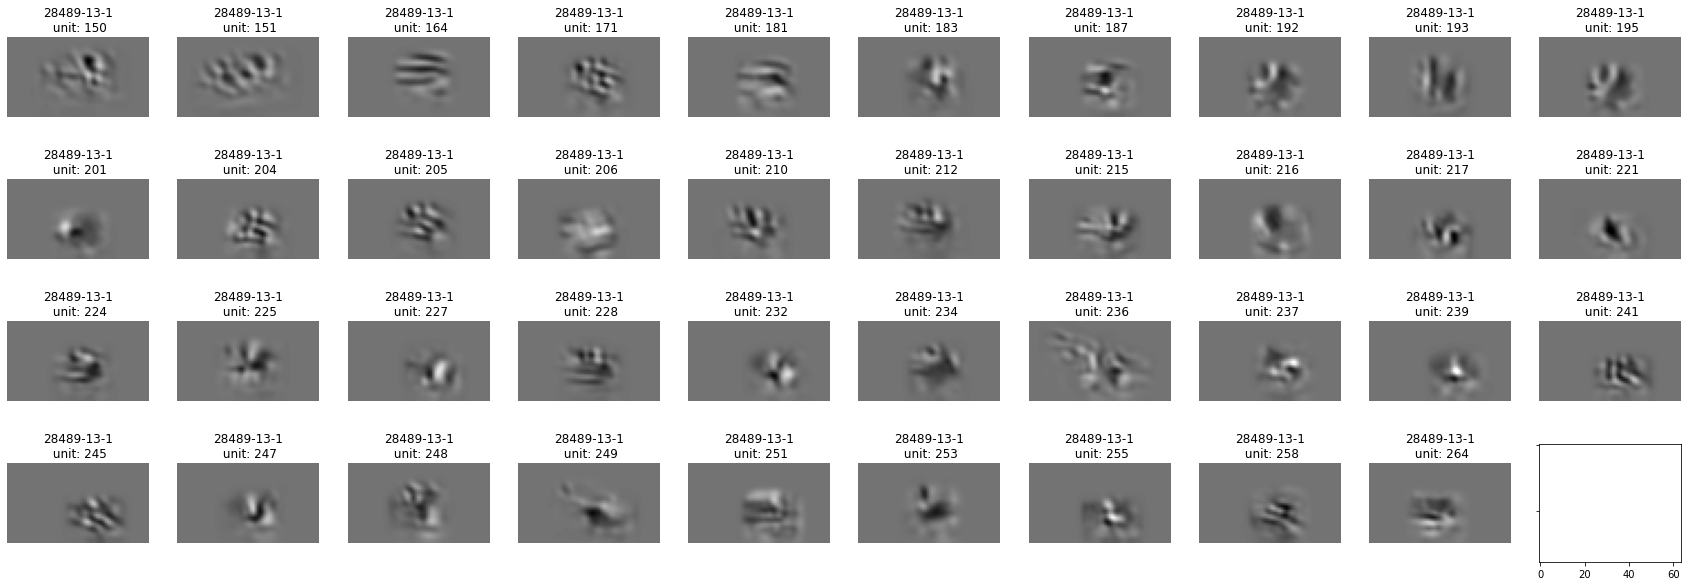

In [46]:
import torch

units, keys, mei_path = (MEI() & 'dataset_hash = "48b2973c6bf9f6e3e42b8f488a90c676"').fetch("unit_id", "data_key", "mei", order_by=('data_key','unit_id'))

ncol = 10
nrow = math.ceil((len(keys)/ncol))


fig, ax = plt.subplots(nrows=nrow, ncols=ncol, sharex=True, sharey=True, figsize=(30, 10), gridspec_kw = {'wspace':0.2, 'hspace':0.2}) 
ax = ax.ravel()
i=0
for ipth in range(len(mei_path)):
    mei = torch.load(mei_path[ipth])
    #print(mei)
    mei_array = mei.detach().cpu().numpy().squeeze()
    ax[i].imshow(mei_array, cmap="gray", vmin=-1.8, vmax=2.2)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].axis("off") 
    ax[i].set_title(f'{keys[ipth]}\n unit: {units[ipth]}')
    #ax[i].set_title(f'{i}')
    i=i+1

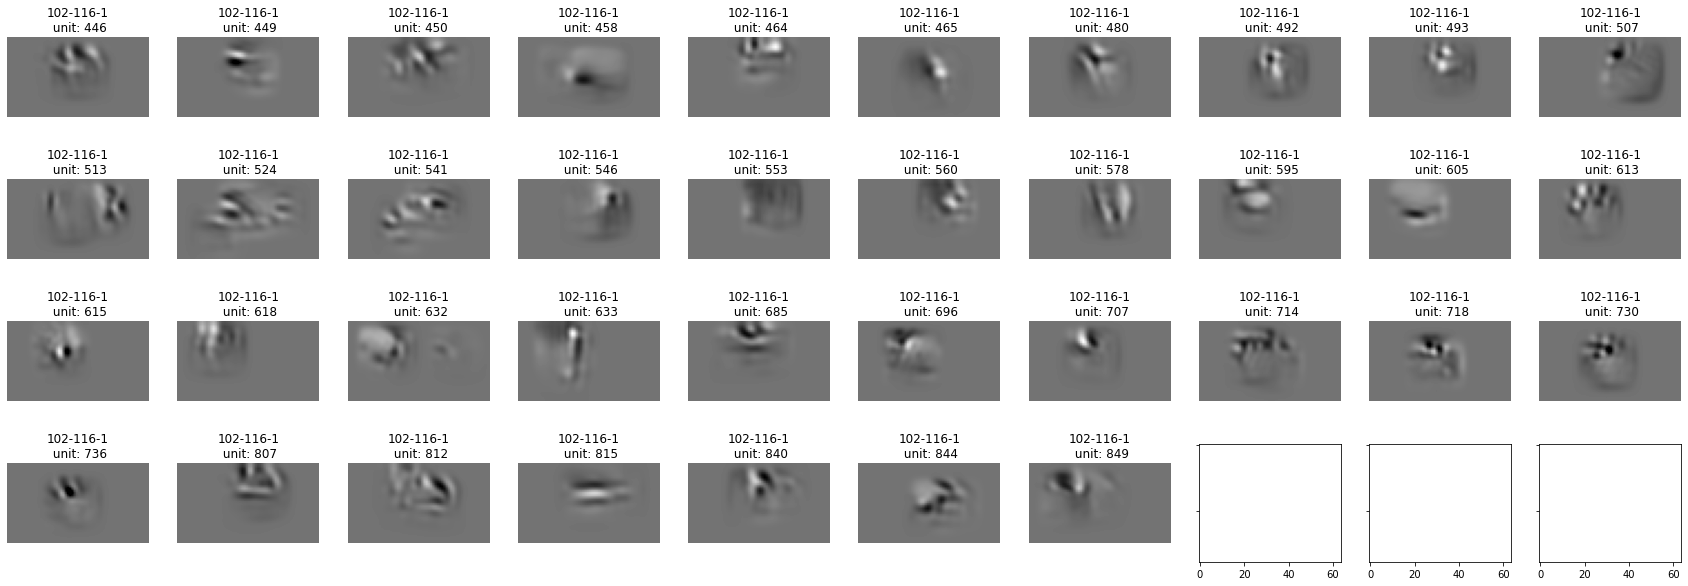

In [78]:
units, keys, mei_path = (MEI() & 'data_key = "102-116-1"').fetch("unit_id", "data_key", "mei", order_by=('data_key','unit_id'))

ncol = 10
nrow = math.ceil((len(keys)/ncol))


fig, ax = plt.subplots(nrows=nrow, ncols=ncol, sharex=True, sharey=True, figsize=(30, 10), gridspec_kw = {'wspace':0.2, 'hspace':0.2}) 
ax = ax.ravel()
i=0
for ipth in range(len(mei_path)):
    mei = torch.load(mei_path[ipth])
    #print(mei)
    mei_array = mei.detach().cpu().numpy().squeeze()
    ax[i].imshow(mei_array, cmap="gray", vmin=-1.8, vmax=2.2)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].axis("off") 
    ax[i].set_title(f'{keys[ipth]}\n unit: {units[ipth]}')
    #ax[i].set_title(f'{i}')
    i=i+1

#fig.savefig('npx_meis_102_116_sua.pdf')
#fig.tight_layout()

In [45]:
mei_df = (MEI() & 'data_key = "102-110-1"').fetch(format="frame", order_by='unit_id asc')
mei_df

mei  \
method_fn                   method_hash                      dataset_fn                        dataset_hash                     ensemble_hash                    unit_id data_key  mei_seed                                                      
mei.methods.gradient_ascent 8c7de77acabedc9479aa207d8e914e9d sensorium.datasets.static_loaders 50acf7555b481ed768dcbc381c9edf30 1b28b1e932d6108704c661703408fca1 534     102-110-1 1000      mei_XBQWgzweDkIBioQpxRFmRQxoZDlcRVFj.pth_0006.tar   
                                                                                                                                                                 541     102-110-1 1000      mei_JhmsyuQoowNFhsyDxFMrEvadjCPTeosY.pth_0006.tar   
                                                                                                                                                                 542     102-110-1 1000      mei_TkgFANDyzHbtdcmmgvmjgeiJrnJvgUnO.pth_0006.tar   
                                                                                                                                                                 544     102-110-1 1000      mei_qHATXaPcDVMdRyeSErTOnbBgYsnvovoa.pth_0006.tar   
                                                                                                                                                                 545     102-110-1 1000      mei_FBNnljsVPBshWqiCOzkEoqqIewVIZHfW.pth_0006.tar   
...                                                                                                                                                                                                                                        ...   
                                                                                                                                                                 924     102-110-1 1000      mei_acIQHGvZZFgUIqfknPfWKgjENTvGFVsE.pth_0001.tar   
                                                                                                                                                                 925     102-110-1 1000      mei_KeDRHpWggyJkhsMGjIkUtqTjwWqpAmhJ.pth_0001.tar   
                                                                                                                                                                 928     102-110-1 1000      mei_SyqHhxNuxooalGZYPbxPoZbUdwaKDXEm.pth_0001.tar   
                                                                                                                                                                 929     102-110-1 1000      mei_KcJVmSrmLOGBCRoHOlBGQDptDQdhZYxn.pth_0001.tar   
                                                                                                                                                                 930     102-110-1 1000      mei_KVplxkDKYeOWcOGjtYNvyUbvAjRdcYJb.pth_0001.tar   

                                                                                                                                                                                                score  \
method_fn                   method_hash                      dataset_fn                        dataset_hash                     ensemble_hash                    unit_id data_key  mei_seed             
mei.methods.gradient_ascent 8c7de77acabedc9479aa207d8e914e9d sensorium.datasets.static_loaders 50acf7555b481ed768dcbc381c9edf30 1b28b1e932d6108704c661703408fca1 534     102-110-1 1000      1.002910   
                                                                                                                                                                 541     102-110-1 1000      0.963177   
                                                                                                                                                                 542     102-110-1 1000      1.650500   
                                                                                   

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

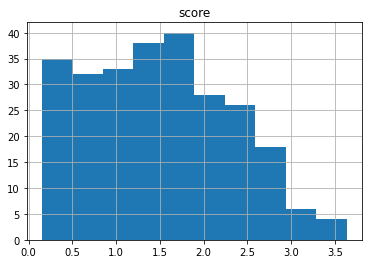

In [46]:
mei_df.hist()

In [43]:
npx = dj.create_virtual_module('neuropixels.py', 'lab_neuropixels')

In [47]:
key = {'animal_id' : 102,
       'session' : 110}

In [51]:
npx.UnitArea() & key & 'unit_id = 634'

animal_id,session,rec_idx,sort_idx,unit_id,area
102,110,1,1,634,LVA


In [56]:
area[0]

'LVA'

In [69]:
key = {'animal_id' : 102,
       'session' : 116}

units, mei_path = (MEI() & 'data_key = "102-116-1"').fetch("unit_id", "mei", order_by=('unit_id asc'))
max_depth = np.max((npx.ClusterInfo & key).fetch('depth'))

data_list = []

for ipth, path in enumerate(mei_path):
    mei = torch.load(path)
    #print(mei)
    mei_array = mei.detach().cpu().numpy().squeeze()
    area = (npx.UnitArea() & key & f'unit_id = {units[ipth]}').fetch('area')[0]
    unit_depth = max_depth - (npx.ClusterInfo & key & f'unit_id = {units[ipth]}').fetch('depth')[0] 
    
    data_list.append([key['animal_id'], key['session'], units[ipth], area, unit_depth, mei_array])

    
   

NameError: name 'npx' is not defined

In [71]:
import pandas as pd

In [72]:
data_df = pd.DataFrame(data_list, columns=['animal_id', 'session', 'unit_id', 'area', 'depth', 'mei'])
data_df

,animal_id,session,unit_id,area,depth,mei
0,102,110,534,LVA,2060.0,"[[-6.077079e-09, 1.606425e-09, -2.2792208e-09,..."
1,102,110,541,LVA,2040.0,"[[-1.2833473e-09, 3.392421e-10, -6.959009e-10,..."
2,102,110,542,LVA,2060.0,"[[-6.2818515e-19, 1.660559e-19, -2.356022e-19,..."
3,102,110,544,LVA,2020.0,"[[-7.145723e-11, 1.8889144e-11, -2.680013e-11,..."
4,102,110,545,LVA,2060.0,"[[-6.3340854e-16, 1.6743635e-16, -2.3756077e-1..."
5,102,110,546,LVA,2040.0,"[[-0.0030531413, 0.00080707314, -0.0011450843,..."
6,102,110,547,LVA,2040.0,"[[-2.230307e-23, 5.8956384e-24, -8.364793e-24,..."
7,102,110,548,LVA,2000.0,"[[-6.87504e-10, 1.8173617e-10, -2.5784952e-10,..."
8,102,110,549,LVA,2000.0,"[[-7.340569e-13, 1.9404178e-13, -2.7530924e-13..."
9,102,110,550,LVA,2000.0,"[[-9.747667e-11, 2.576718e-11, -3.6558784e-11,..."


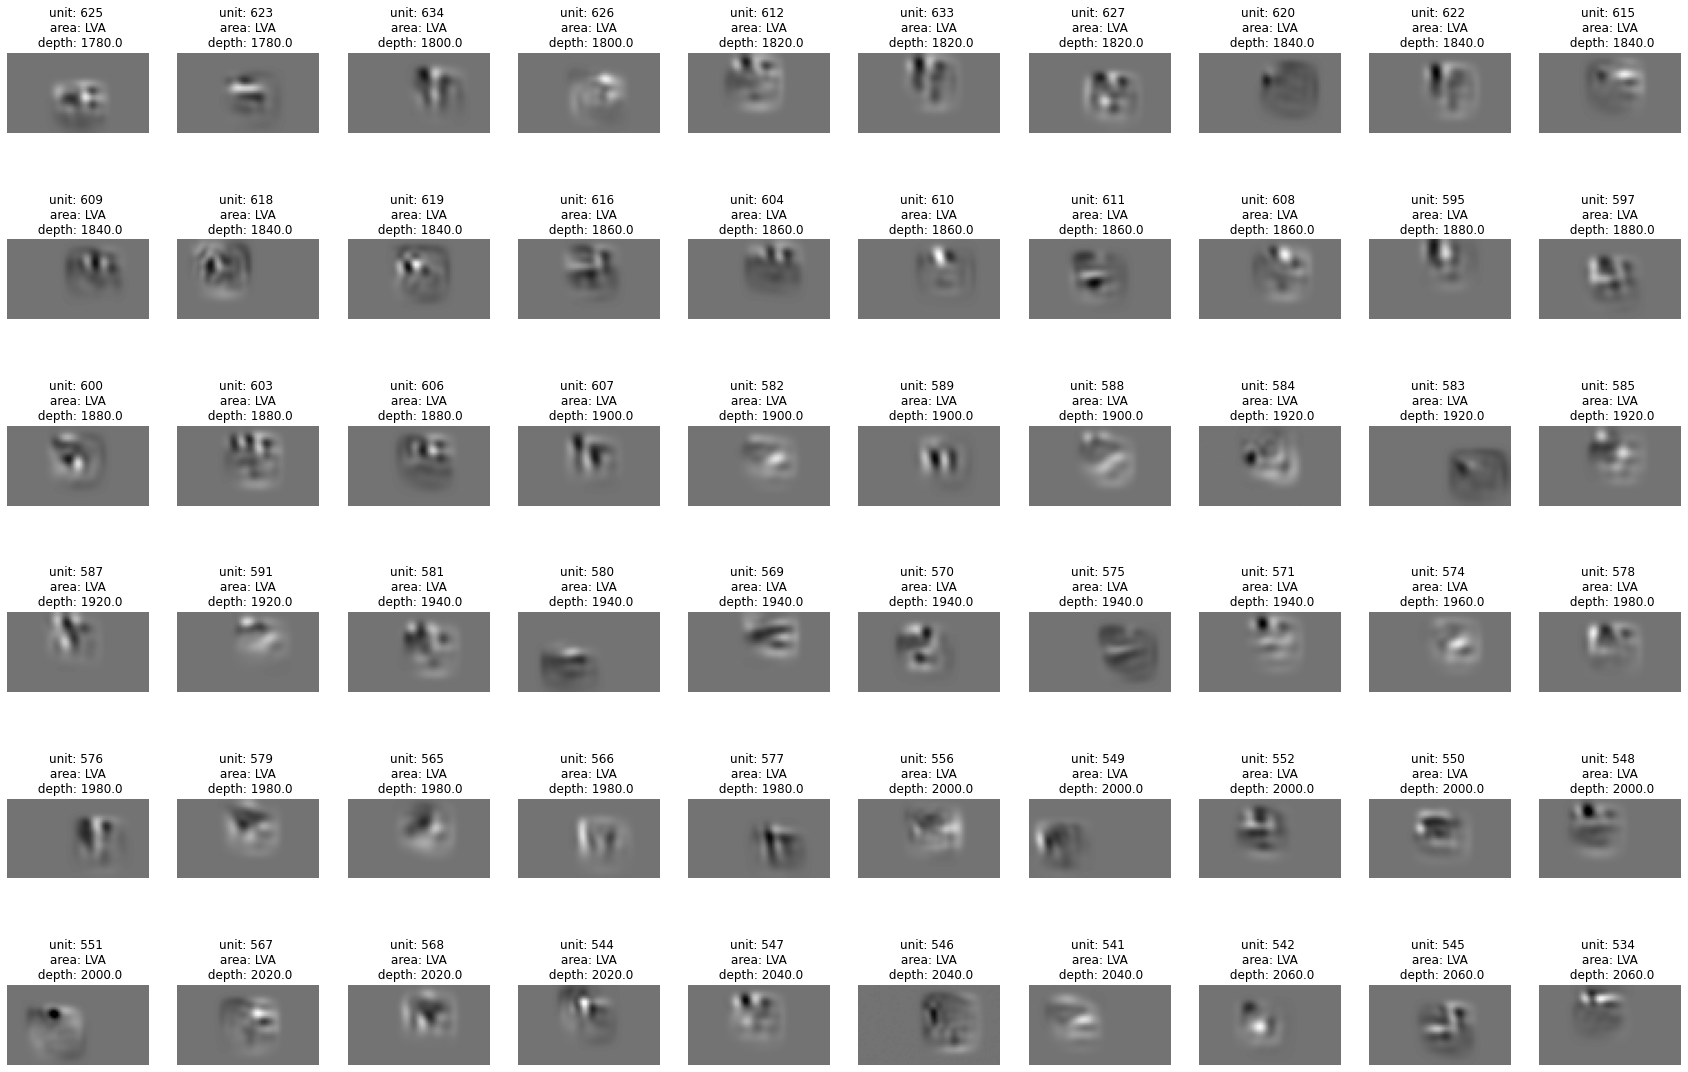

In [93]:
data_df = data_df.sort_values(by=['depth'])
data_df = data_df.reset_index(drop=True)

ncol = 10
nrow = math.ceil((len(data_df)/ncol))


fig, ax = plt.subplots(nrows=nrow, ncols=ncol, sharex=True, sharey=True, figsize=(30, 20), gridspec_kw = {'wspace':0.2, 'hspace':0.2}) 
ax = ax.ravel()
i=0
for ipth in range(len(data_df)):
    
    ax[i].imshow(data_df['mei'][ipth], cmap="gray", vmin=-1.8, vmax=2.2)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].axis("off") 
    #ax[i].set_title(f'{keys[ipth]}, unit: {units[ipth]}')
    ax[i].set_title(f'unit: {data_df["unit_id"][ipth]} \n area: {data_df["area"][ipth]} \n depth: {data_df["depth"][ipth]}')
    i=i+1